<a href="https://colab.research.google.com/github/SumiranRai/MDSC-Lab/blob/main/MDSC-203-Machine-Learning/Machine_Learning_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning For Classification Task

By Sumiran Rai

Regd. No. - 24040208007

### Dataset Overview
This dataset is derived from the BRFSS 2015 (Behavioral Risk Factor Surveillance System), a CDC survey on health behaviors and chronic conditions. We are using the diabetes_012_health_indicators_BRFSS2015.csv dataset, which contains 253,680 responses and 21 features.

#### Target Variable (Diabetes_012)
* 0 → No diabetes (or gestational diabetes)
* 1 → Prediabetes
* 2 → Diabetes

The dataset is imbalanced, with fewer prediabetes cases compared to the other classes.

#### About Diabetes
Diabetes is a chronic condition where the body struggles to regulate blood sugar due to insulin resistance or deficiency. It increases the risk of heart disease, kidney failure, vision loss, and amputations. Early detection enables preventive care and better health outcomes.

### Understanding the Data

Importing required libraries

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

Loading the data

In [2]:
url = "https://raw.githubusercontent.com/SumiranRai/MDSC-Lab/main/MDSC-203-Machine-Learning/diabetes_012_health_indicators_BRFSS2015.csv"
data = pd.read_csv(url)
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


Shape of the data

In [3]:
print(data.shape)

(253680, 22)


Data type of each feature

In [4]:
types = data.dtypes
print(types)

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object


Let's understand the data

In [5]:
from pandas import set_option
with pd.option_context('display.width', 150, 'display.precision', 2):
  description = data.describe()
  print(description)

       Diabetes_012     HighBP   HighChol  CholCheck        BMI     Smoker     Stroke  HeartDiseaseorAttack  PhysActivity     Fruits  ...  \
count      253680.0  253680.00  253680.00  253680.00  253680.00  253680.00  253680.00             253680.00     253680.00  253680.00  ...   
mean            0.3       0.43       0.42       0.96      28.38       0.44       0.04                  0.09          0.76       0.63  ...   
std             0.7       0.49       0.49       0.19       6.61       0.50       0.20                  0.29          0.43       0.48  ...   
min             0.0       0.00       0.00       0.00      12.00       0.00       0.00                  0.00          0.00       0.00  ...   
25%             0.0       0.00       0.00       1.00      24.00       0.00       0.00                  0.00          1.00       0.00  ...   
50%             0.0       0.00       0.00       1.00      27.00       0.00       0.00                  0.00          1.00       1.00  ...   
75%          

###Dataset is Imbalanced!

0 - No Diabetes

1 - Pre-Diabetic

2 - Diabetic

In [6]:
class_counts = data.groupby('Diabetes_012').size()
print(class_counts)

Diabetes_012
0.0    213703
1.0      4631
2.0     35346
dtype: int64


Correlations

In [7]:
with pd.option_context('display.width', 150, 'display.precision', 2):
  correlations = data.corr(method='pearson')
  print(correlations)

                      Diabetes_012    HighBP  HighChol  CholCheck   BMI    Smoker    Stroke  HeartDiseaseorAttack  PhysActivity  Fruits  ...  \
Diabetes_012                  1.00  2.72e-01      0.21   6.75e-02  0.22  6.29e-02  1.07e-01                  0.18     -1.22e-01   -0.04  ...   
HighBP                        0.27  1.00e+00      0.30   9.85e-02  0.21  9.70e-02  1.30e-01                  0.21     -1.25e-01   -0.04  ...   
HighChol                      0.21  2.98e-01      1.00   8.56e-02  0.11  9.13e-02  9.26e-02                  0.18     -7.80e-02   -0.04  ...   
CholCheck                     0.07  9.85e-02      0.09   1.00e+00  0.03 -9.93e-03  2.42e-02                  0.04      4.19e-03    0.02  ...   
BMI                           0.22  2.14e-01      0.11   3.45e-02  1.00  1.38e-02  2.02e-02                  0.05     -1.47e-01   -0.09  ...   
Smoker                        0.06  9.70e-02      0.09  -9.93e-03  0.01  1.00e+00  6.12e-02                  0.11     -8.74e-02   -0.08 

Skewness

In [8]:
skew = data.skew()
print(skew)

Diabetes_012            1.976390
HighBP                  0.286904
HighChol                0.307075
CholCheck              -4.881271
BMI                     2.122004
Smoker                  0.228810
Stroke                  4.657340
HeartDiseaseorAttack    2.778742
PhysActivity           -1.195546
Fruits                 -0.557500
Veggies                -1.592239
HvyAlcoholConsump       3.854132
AnyHealthcare          -4.181116
NoDocbcCost             2.995290
GenHlth                 0.422867
MentHlth                2.721148
PhysHlth                2.207395
DiffWalk                1.773907
Sex                     0.240350
Age                    -0.359903
Education              -0.777255
Income                 -0.891345
dtype: float64


### Visualizing the Data

#### Histograms

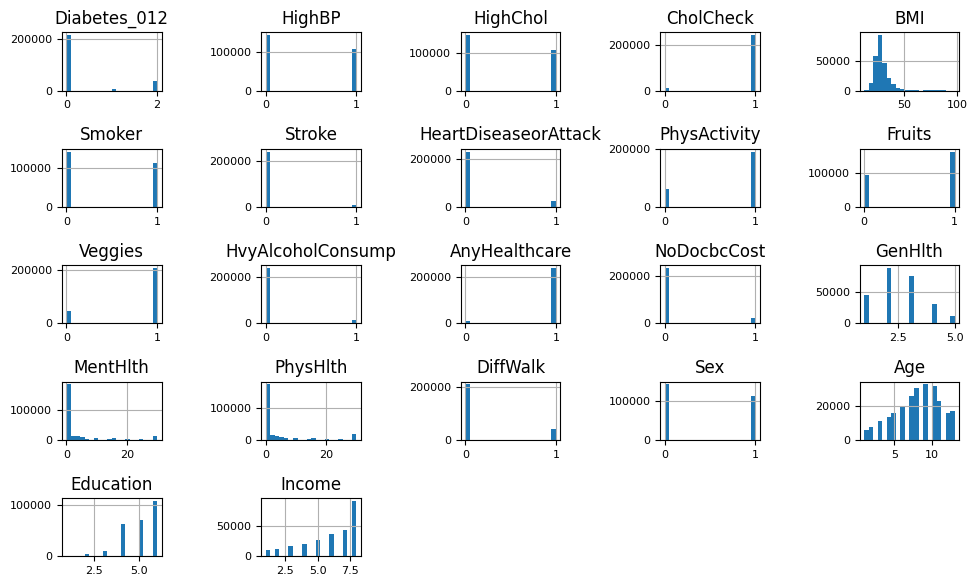

In [9]:
# Create histograms
fig = data.hist(figsize=(10, 6), bins=20, grid=True)

# Adjust layout and font sizes
plt.tight_layout()
plt.subplots_adjust(hspace=1, wspace=1)  # Adjust spacing between subplots

# Reduce font size for better readability
for ax in fig.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=10)
    ax.set_ylabel(ax.get_ylabel(), fontsize=10)
    ax.set_title(ax.get_title(), fontsize=12)
    ax.tick_params(axis='both', labelsize=8)  # Reduce tick label font size

plt.show()


#### Density Plots

In [10]:
# Takes too much time for a large Dataset.
#data.plot(kind='density', subplots=True, layout=(5,5), sharex=False)
#plt.show()


#### Box and Whisker Plots

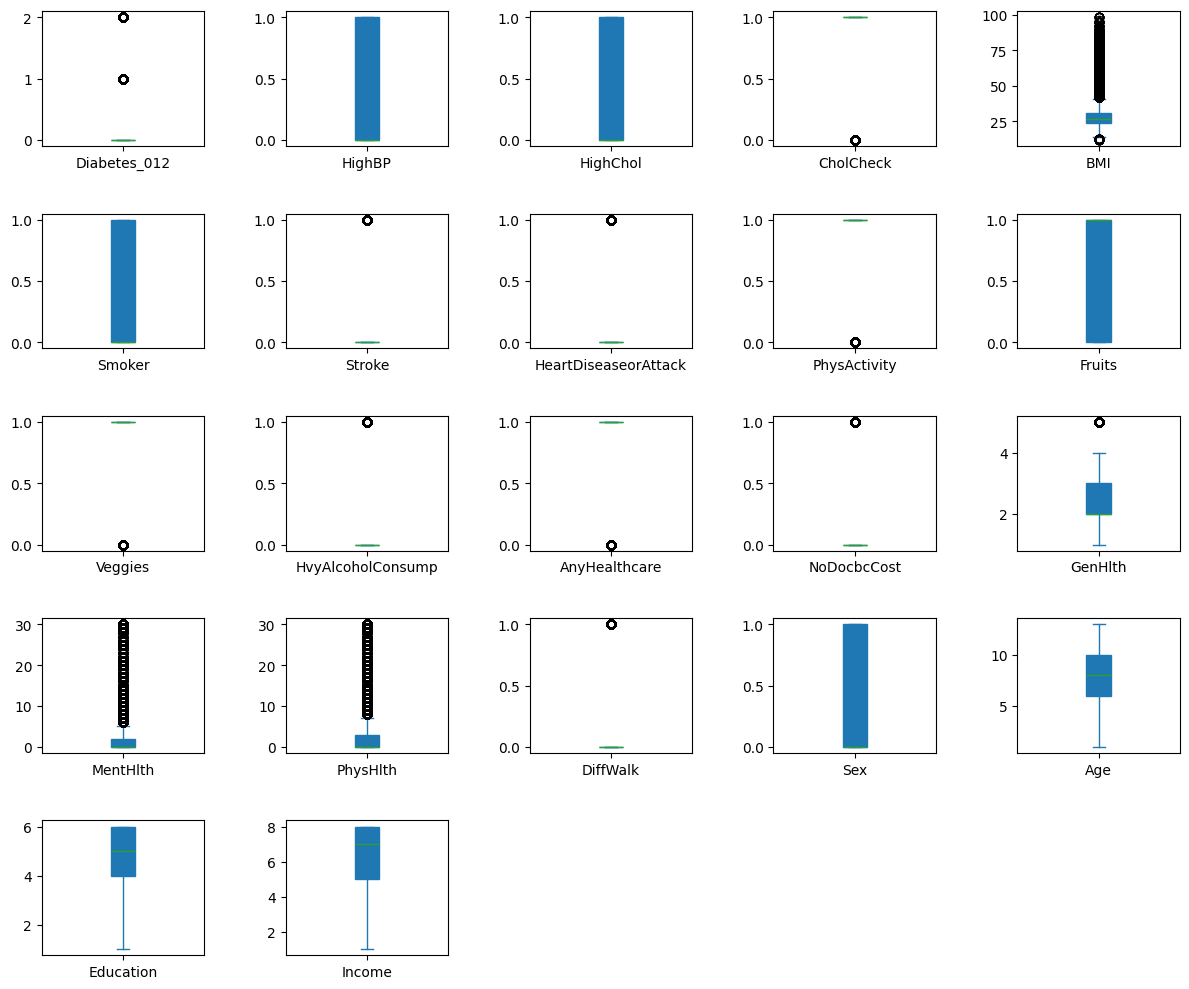

In [11]:
axes = data.plot(kind='box', subplots=True, layout=(5, 5), sharex=False, sharey=False, figsize=(12, 10), patch_artist=True, vert=True)

plt.tight_layout()
plt.subplots_adjust(hspace=0.5, wspace=0.5)

if isinstance(axes, np.ndarray):  # If axes is an array
    axes = axes.flatten()
else:  # If only one subplot exists (Series case)
    axes = [axes]

plt.show()

#### Correlation matrix

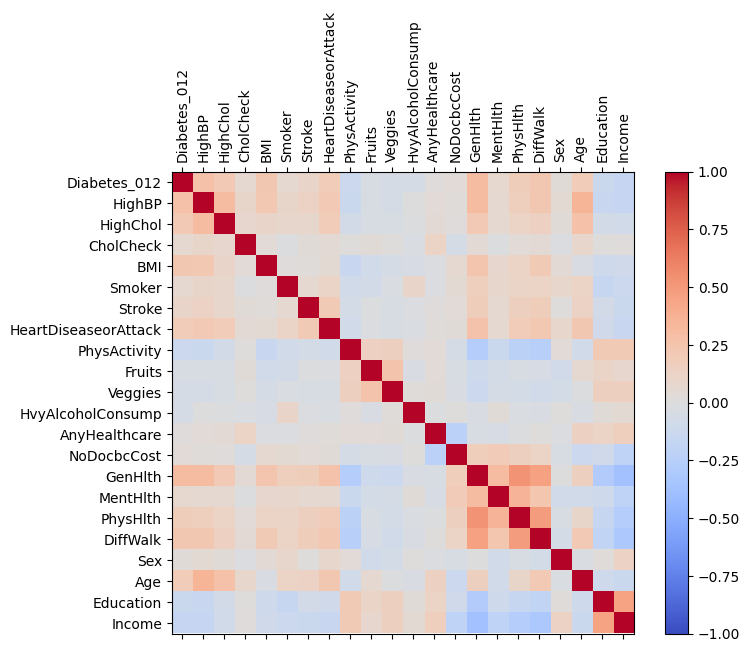

In [12]:
# Plot correlation matrix
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(correlations, vmin=-1, vmax=1, cmap='coolwarm')
fig.colorbar(cax)

# Set ticks and labels
ticks = np.arange(len(data.columns))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns, rotation=90)  # Rotate for better readability
ax.set_yticklabels(data.columns)

plt.show()

Generic Correlation Matrix

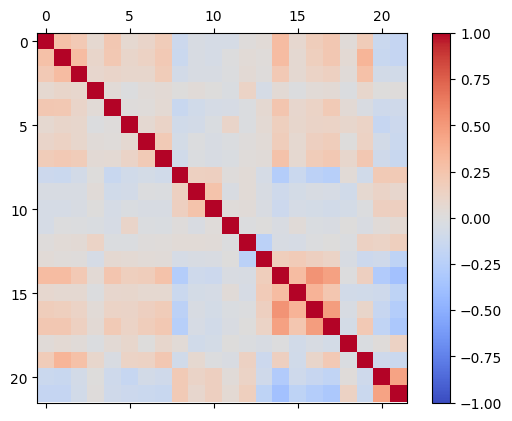

In [13]:
#plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1, cmap='coolwarm')
fig.colorbar(cax)
plt.show()


#### Scatter Plot


In [14]:
# Avoided plotting because it takes too much computational time for a large Dataset.
"""
from pandas.plotting import scatter_matrix

fig = scatter_matrix(data, figsize=(10, 10), diagonal='hist', marker='o', alpha=0.7, s=10, hist_kwds={'bins': 20})

for ax in fig.flatten():
    ax.xaxis.label.set_fontsize(10)
    ax.yaxis.label.set_fontsize(10)
    ax.tick_params(axis='both', labelsize=8)

plt.xticks(rotation=45)
plt.show()
"""

"\nfrom pandas.plotting import scatter_matrix\n\nfig = scatter_matrix(data, figsize=(10, 10), diagonal='hist', marker='o', alpha=0.7, s=10, hist_kwds={'bins': 20})\n\nfor ax in fig.flatten():\n    ax.xaxis.label.set_fontsize(10)\n    ax.yaxis.label.set_fontsize(10)\n    ax.tick_params(axis='both', labelsize=8)\n\nplt.xticks(rotation=45)\nplt.show()\n"

### Data Preparation

#### Rescale Data

In [15]:
array = data.values

# First column (index 0) is the target (Y)
Y = array[:, 0]

# Remaining 21 columns (index 1 to 21) are features (X)
X = array[:, 1:22]

In [16]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max Scaling to features only
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)

# Print first 5 rows of scaled data
set_printoptions(precision=3)
print(rescaledX[0:5, :])

[[1.    1.    1.    0.326 1.    0.    0.    0.    0.    1.    0.    1.
  0.    1.    0.6   0.5   1.    0.    0.667 0.6   0.286]
 [0.    0.    0.    0.151 1.    0.    0.    1.    0.    0.    0.    0.
  1.    0.5   0.    0.    0.    0.    0.5   1.    0.   ]
 [1.    1.    1.    0.186 0.    0.    0.    0.    1.    0.    0.    1.
  1.    1.    1.    1.    1.    0.    0.667 0.6   1.   ]
 [1.    0.    1.    0.174 0.    0.    0.    1.    1.    1.    0.    1.
  0.    0.25  0.    0.    0.    0.    0.833 0.4   0.714]
 [1.    1.    1.    0.14  0.    0.    0.    1.    1.    1.    0.    1.
  0.    0.25  0.1   0.    0.    0.    0.833 0.8   0.429]]


#### Standardize Data

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[ 1.154  1.165  0.197  1.758  1.121 -0.206 -0.322 -1.763 -1.317  0.482
  -0.244  0.227 -0.303  2.329  1.999  1.234  2.224 -0.887  0.317 -1.066
  -1.474]
 [-0.867 -0.858 -5.078 -0.512  1.121 -0.206 -0.322  0.567 -1.317 -2.074
  -0.244 -4.408  3.298  0.457 -0.43  -0.487 -0.45  -0.887 -0.338  0.963
  -2.44 ]
 [ 1.154  1.165  0.197 -0.058 -0.892 -0.206 -0.322 -1.763  0.759 -2.074
  -0.244  0.227  3.298  2.329  3.617  2.955  2.224 -0.887  0.317 -1.066
   0.94 ]
 [ 1.154 -0.858  0.197 -0.209 -0.892 -0.206 -0.322  0.567  0.759  0.482
  -0.244  0.227 -0.303 -0.479 -0.43  -0.487 -0.45  -0.887  0.972 -2.08
  -0.026]
 [ 1.154  1.165  0.197 -0.663 -0.892 -0.206 -0.322  0.567  0.759  0.482
  -0.244  0.227 -0.303 -0.479 -0.025 -0.487 -0.45  -0.887  0.972 -0.051
  -0.992]]


#### Normalize Data

In [18]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(normalizedX[0:5,:])

[[0.021 0.021 0.021 0.836 0.021 0.    0.    0.    0.    0.021 0.    0.021
  0.    0.105 0.376 0.314 0.021 0.    0.188 0.084 0.063]
 [0.    0.    0.    0.93  0.037 0.    0.    0.037 0.    0.    0.    0.
  0.037 0.112 0.    0.    0.    0.    0.26  0.223 0.037]
 [0.019 0.019 0.019 0.531 0.    0.    0.    0.    0.019 0.    0.    0.019
  0.019 0.095 0.569 0.569 0.019 0.    0.171 0.076 0.152]
 [0.033 0.    0.033 0.898 0.    0.    0.    0.033 0.033 0.033 0.    0.033
  0.    0.066 0.    0.    0.    0.    0.366 0.1   0.199]
 [0.036 0.036 0.036 0.872 0.    0.    0.    0.036 0.036 0.036 0.    0.036
  0.    0.073 0.109 0.    0.    0.    0.4   0.182 0.145]]


#### Binarize Data

In [19]:
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=0.0).fit(X)
binaryX = binarizer.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(binaryX[0:5,:])

[[1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1.]]


### Feature Selection

#### Univariate Selection

Statistical tests can be used to select those features that have the strongest relationship with
the output variable.
The scikit-learn library provides the SelectKBest class2
that can be used
with a suite of different statistical tests to select a specific number of features. The example
below uses the chi-squared (chi2
) statistical test for non-negative features to select 11 of the best
features from the dataset.

In [20]:
from sklearn.feature_selection import SelectKBest, chi2

# Feature selection
X = data.iloc[:, 1:22]  # Selecting feature columns
Y = data.iloc[:, 0]     # Target column

# Applying SelectKBest
test = SelectKBest(score_func=chi2, k=11)
fit = test.fit(X, Y)

# Get selected feature indices
selected_indices = fit.get_support(indices=True)

# Get the feature names
selected_features = X.columns[selected_indices]

# Print scores and selected feature names
print("Feature Scores:\n", fit.scores_)
print("\nSelected Features:\n", selected_features)

# Transform dataset to include only selected features
X_selected = fit.transform(X)

# Convert to DataFrame for better readability
X_selected_df = pd.DataFrame(X_selected, columns=selected_features)

# Display first 5 rows of selected features
print(X_selected_df.head())

Feature Scores:
 [1.073e+04 6.484e+03 4.382e+01 1.978e+04 5.627e+02 2.798e+03 7.468e+03
 9.225e+02 1.662e+02 1.686e+02 8.025e+02 3.381e+00 3.627e+02 1.060e+04
 2.461e+04 1.416e+05 1.063e+04 1.404e+02 1.023e+04 8.492e+02 5.380e+03]

Selected Features:
 Index(['HighBP', 'HighChol', 'BMI', 'Stroke', 'HeartDiseaseorAttack',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Income'],
      dtype='object')
   HighBP  HighChol   BMI  Stroke  HeartDiseaseorAttack  GenHlth  MentHlth  \
0     1.0       1.0  40.0     0.0                   0.0      5.0      18.0   
1     0.0       0.0  25.0     0.0                   0.0      3.0       0.0   
2     1.0       1.0  28.0     0.0                   0.0      5.0      30.0   
3     1.0       0.0  27.0     0.0                   0.0      2.0       0.0   
4     1.0       1.0  24.0     0.0                   0.0      2.0       3.0   

   PhysHlth  DiffWalk   Age  Income  
0      15.0       1.0   9.0     3.0  
1       0.0       0.0   7.0     1.0  
2

#### Recursive Feature Elimination

The Recursive Feature Elimination (or RFE) works by recursively removing attributes and
building a model on those attributes that remain. It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

In [21]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

feature_names = X.columns  # Get column names

# Define model
model = LogisticRegression(solver='liblinear')

# Apply RFE
num_features = 7  # Change as needed
rfe = RFE(estimator=model, n_features_to_select=num_features)
rfe.fit(X, Y)

# Get selected feature names
selected_features = X.columns[rfe.support_]

# Print results
print(f"Selected {num_features} Features:", list(selected_features))
print("Feature Ranking:", rfe.ranking_)

# Create DataFrame with selected features
X_selected_df = X.loc[:, rfe.support_]
print(X_selected_df.head())  # Display first 5 rows

Selected 7 Features: ['HighBP', 'HighChol', 'CholCheck', 'HeartDiseaseorAttack', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk']
Feature Ranking: [ 1  1  1  9 13  4  1 12 10 11  1  5  2  1 15 14  1  3  7  6  8]
   HighBP  HighChol  CholCheck  HeartDiseaseorAttack  HvyAlcoholConsump  \
0     1.0       1.0        1.0                   0.0                0.0   
1     0.0       0.0        0.0                   0.0                0.0   
2     1.0       1.0        1.0                   0.0                0.0   
3     1.0       0.0        1.0                   0.0                0.0   
4     1.0       1.0        1.0                   0.0                0.0   

   GenHlth  DiffWalk  
0      5.0       1.0  
1      3.0       0.0  
2      5.0       1.0  
3      2.0       0.0  
4      2.0       0.0  


#### Principal Component Analysis

Principal Component Analysis (or PCA) uses linear algebra to transform the dataset into a
compressed form. Generally this is called a data reduction technique. A property of PCA is that
you can choose the number of dimensions or principal components in the transformed result.

PCA with Feature Labels

In [22]:
from sklearn.decomposition import PCA

# Apply PCA
n_components = 1 # Change as needed
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# Create a DataFrame with PCA components
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components)])

# Print explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Get feature contributions to principal components
pca_components = pd.DataFrame(pca.components_, columns=feature_names,
                              index=[f'PC{i+1}' for i in range(n_components)])
print("\nFeature Contributions to Each Principal Component:\n", pca_components)

# Show the transformed PCA dataset
print("\nFirst 5 rows of transformed PCA features:\n", pca_df.head())

Explained Variance Ratio: [0.483]

Feature Contributions to Each Principal Component:
        HighBP  HighChol  CholCheck       BMI    Smoker    Stroke  \
PC1  0.008993  0.006827    0.00049  0.166758  0.006724  0.002997   

     HeartDiseaseorAttack  PhysActivity    Fruits   Veggies  ...  \
PC1              0.005266     -0.010608 -0.003662 -0.003364  ...   

     AnyHealthcare  NoDocbcCost   GenHlth  MentHlth  PhysHlth  DiffWalk  \
PC1      -0.000716     0.005769  0.061694  0.527125  0.827455  0.018847   

          Sex       Age  Education    Income  
PC1 -0.003208  0.012785  -0.018467 -0.067764  

[1 rows x 21 columns]

First 5 rows of transformed PCA features:
          PC1
0  19.079268
1  -5.408459
2  35.475433
3  -5.379667
4  -4.193144


Determine the Optimal Number of Components

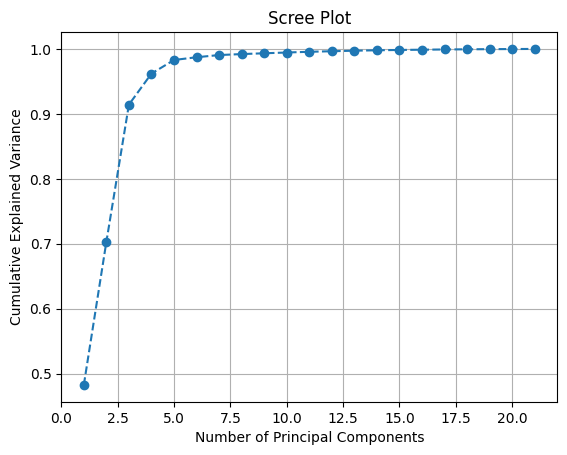

In [23]:
pca_full = PCA().fit(X)  # Fit PCA with all components
explained_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid()
plt.show()

 Automatic Selection (95% Variance)

 If the optimal number of principal components (PCs) is 1, it means that a single principal component explains most of the variance in your dataset.

In [24]:
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1  # First index where ≥ 95%
print(f"Optimal number of components: {optimal_components}")


Optimal number of components: 4


#### Feature Importance

Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance
of features.

                 Feature  Importance
3                    BMI    0.205035
18                   Age    0.122626
20                Income    0.095591
15              PhysHlth    0.088835
14              MentHlth    0.073889
19             Education    0.072752
13               GenHlth    0.066957
0                 HighBP    0.043864
8                 Fruits    0.028034
4                 Smoker    0.026703
1               HighChol    0.025962
16              DiffWalk    0.024268
9                Veggies    0.022840
17                   Sex    0.021950
7           PhysActivity    0.019386
6   HeartDiseaseorAttack    0.015776
12           NoDocbcCost    0.015167
5                 Stroke    0.011017
11         AnyHealthcare    0.009087
10     HvyAlcoholConsump    0.006599
2              CholCheck    0.003662


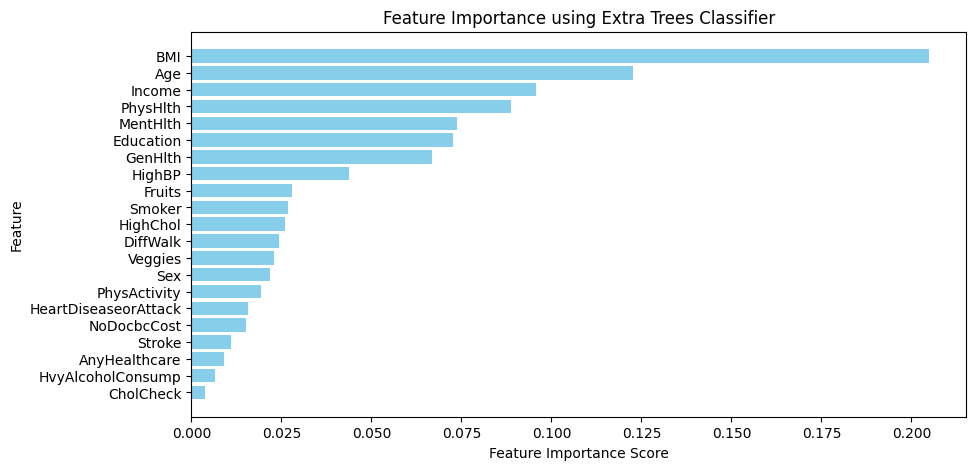

In [25]:
from sklearn.ensemble import ExtraTreesClassifier

# Feature importance with Extra Trees Classifier
model = ExtraTreesClassifier(n_estimators=100, random_state=42)  # Use more trees for better stability
model.fit(X, Y)

# Get feature importance scores
feature_importance = model.feature_importances_

# Create DataFrame for better visualization
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)  # Sort by importance

# Print sorted feature importance
print(importance_df)

# Optional: Plot the feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.barh(importance_df["Feature"], importance_df["Importance"], color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance using Extra Trees Classifier")
plt.gca().invert_yaxis()  # Reverse order for better visualization
plt.show()

### Performance Evaluation of ML Algorithms

#### Split into Train and Test Sets

70% - Training set

30% - Test set

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.exceptions import ConvergenceWarning
import warnings

# Ignore convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=7)

# Feature Scaling (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define & Train Logistic Regression
model = LogisticRegression(solver='saga', max_iter=1000, C=1.0)  # C=1.0 (default regularization)
model.fit(X_train, Y_train)

# Evaluate Model
accuracy = model.score(X_test, Y_test) * 100.0
print(f"Accuracy: {accuracy:.3f}%")


Accuracy: 84.458%


#### K-fold Cross Validation

K-Fold Cross Validation is a technique to estimate model performance with lower variance than a single train-test split. It works by dividing the dataset into k equal parts (folds), where the model is trained on k-1 folds and tested on the remaining one. This process repeats k times, with each fold serving as the test set once.

After training, we get k performance scores, which are averaged to provide a more reliable estimate of the model's performance. Common values of k are 3, 5, or 10, depending on dataset size. This method ensures the model is tested on different data, leading to a more generalizable evaluation.

In [27]:
from sklearn.model_selection import KFold, cross_val_score

# Define k-fold cross-validation
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)  # Fixed issue

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale the entire dataset

# Define model
model = LogisticRegression(solver='saga', max_iter=1000)  # saga is better for large datasets

# Evaluate model using cross-validation
results = cross_val_score(model, X_scaled, Y, cv=kfold, scoring='accuracy')

# Print results
print(f"Accuracy: {results.mean() * 100:.3f}% ± {results.std() * 100:.3f}%")

Accuracy: 84.647% ± 0.155%


#### Leave One Out Cross Validation

This variation of cross validation is called leave-one-out cross
validation. The result is a large number of performance measures that can be summarized in an effort to give a more reasonable estimate of the accuracy of your model on unseen data.

A downside is that it can be a computationally more expensive procedure than k-fold cross
validation.

Leave-One-Out (LOO) is computationally expensive → Not ideal for large datasets (250,000 instances).

In [28]:
"""
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale the entire dataset

# Define Leave-One-Out Cross-Validation
loocv = LeaveOneOut()

# Define Model
model = LogisticRegression(solver='saga', max_iter=1000)  # 'saga' is better for large datasets

# Evaluate Model
results = cross_val_score(model, X_scaled, Y, cv=loocv, scoring='accuracy')

# Print Results
print(f"Accuracy: {results.mean() * 100:.3f}% ± {results.std() * 100:.3f}%")
"""

# Skipped evaluating because it took too much time.

'\nfrom sklearn.model_selection import LeaveOneOut, cross_val_score\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.preprocessing import StandardScaler\nimport numpy as np\n\n# Normalize features\nscaler = StandardScaler()\nX_scaled = scaler.fit_transform(X)  # Scale the entire dataset\n\n# Define Leave-One-Out Cross-Validation\nloocv = LeaveOneOut()\n\n# Define Model\nmodel = LogisticRegression(solver=\'saga\', max_iter=1000)  # \'saga\' is better for large datasets\n\n# Evaluate Model\nresults = cross_val_score(model, X_scaled, Y, cv=loocv, scoring=\'accuracy\')\n\n# Print Results\nprint(f"Accuracy: {results.mean() * 100:.3f}% ± {results.std() * 100:.3f}%")\n'

#### Repeated Random Test-Train Splits

Repeated Random Train-Test Splitting is a variation of k-fold cross-validation that repeatedly splits the dataset into training and testing sets. It offers:

✔ Faster evaluation than k-fold cross-validation.

✔ Lower variance than a single train-test split.

✔ More repetitions for improved accuracy.

🔹 Downside: Some data points may appear in multiple test sets, causing redundancy.


In [29]:
from sklearn.model_selection import ShuffleSplit, cross_val_score

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define Shuffle Split CV
n_splits = 10
test_size = 0.33
seed = 7
shuffle_split = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=seed)

# Define Model
model = LogisticRegression(solver='saga', max_iter=1000)  # 'saga' works well for large datasets

# Evaluate Model
results = cross_val_score(model, X_scaled, Y, cv=shuffle_split, scoring='accuracy')

# Print Results
print(f"Accuracy: {results.mean() * 100:.3f}% ± {results.std() * 100:.3f}%")


Accuracy: 84.647% ± 0.092%


### ML Algorithm Performance Metrics

#### Classification Accuracy

Classification accuracy is the number of correct predictions made as a ratio of all predictions
made. This is the most common evaluation metric for classification problems, it is also the most
misused. It is really only suitable when there are an equal number of observations in each class
(which is rarely the case) and that all predictions and prediction errors are equally important,
which is often not the case.

In [30]:
from sklearn.model_selection import KFold, cross_val_score

# Define K-Fold CV
kfold = KFold(n_splits=10, random_state=7, shuffle=True)  # Added shuffle for randomness

# Define Model
model = LogisticRegression(solver='saga', max_iter=1000)  # 'saga' for large datasets

# Evaluate Model
results = cross_val_score(model, X_scaled, Y, cv=kfold, scoring='accuracy')

# Print Results
print(f"Accuracy: {results.mean():.3f} ± {results.std():.3f}")

Accuracy: 0.846 ± 0.002


#### Logatrithmic Loss

Logarithmic loss (or logloss) is a performance metric for evaluating the predictions of probabilities
of membership to a given class. The scalar probability between 0 and 1 can be seen as a measure
of confidence for a prediction by an algorithm. Predictions that are correct or incorrect are
rewarded or punished proportionally to the confidence of the prediction.

In [31]:
# Use Log Loss as the evaluation metric
scoring = 'neg_log_loss'
results = cross_val_score(model, X_scaled, Y, cv=kfold, scoring=scoring)

# Print log loss correctly
print(f"Log Loss: {results.mean():.3f} ({results.std():.3f})")


Log Loss: -0.401 (0.003)


#### Area Under ROC Curve

Area under ROC Curve (or AUC for short) is a performance metric for binary classification
problems. The AUC represents a model’s ability to discriminate between positive and negative
classes.

An area of 1.0 represents a model that made all predictions perfectly. An area of
0.5 represents a model that is as good as random.


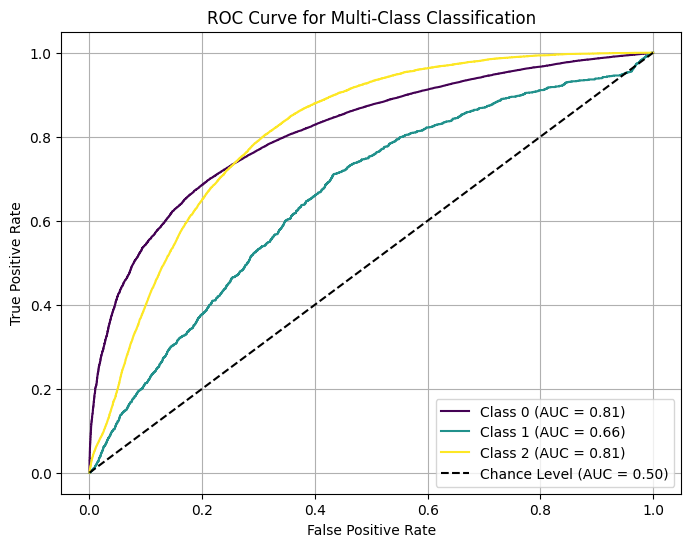

In [32]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Assuming Y_train and Y_test contain class labels as integers (0, 1, 2, ...)
n_classes = len(np.unique(Y_train))  # Ensure we use training labels to determine classes

# Binarize labels for multi-class ROC (only for Y_test)
Y_test_binarized = label_binarize(Y_test, classes=np.arange(n_classes))

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train OneVsRest Classifier with Logistic Regression
model = OneVsRestClassifier(LogisticRegression(solver='saga', max_iter=500, class_weight="balanced"))
model.fit(X_train, Y_train)

# Get probability scores
Y_score = model.predict_proba(X_test)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
colors = plt.cm.viridis(np.linspace(0, 1, n_classes))  # Dynamically generate colors

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(Y_test_binarized[:, i], Y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], label=f"Class {i} (AUC = {roc_auc:.2f})")

# Plot random chance line
plt.plot([0, 1], [0, 1], "k--", label="Chance Level (AUC = 0.50)")

# Formatting the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class Classification")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#### Confusion Matrix

A confusion matrix summarizes model performance by comparing predicted vs. actual class labels. Rows represent actual classes, columns represent predictions, and cells show correct and incorrect counts. It helps evaluate classification accuracy for both binary and multi-class problems.

In [33]:
from sklearn.metrics import confusion_matrix

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# Define logistic regression model with multi-class support
model = OneVsRestClassifier(LogisticRegression(solver='saga', max_iter=500, class_weight="balanced") ) # or 'multinomial'
model.fit(X_train, Y_train)

# Make predictions
predicted = model.predict(X_test)

# Compute confusion matrix
matrix = confusion_matrix(Y_test, predicted)

# Print the confusion matrix
print("Confusion Matrix:")
print(matrix)


Confusion Matrix:
[[50120  4410 15882]
 [  528   188   821]
 [ 2430   990  8346]]


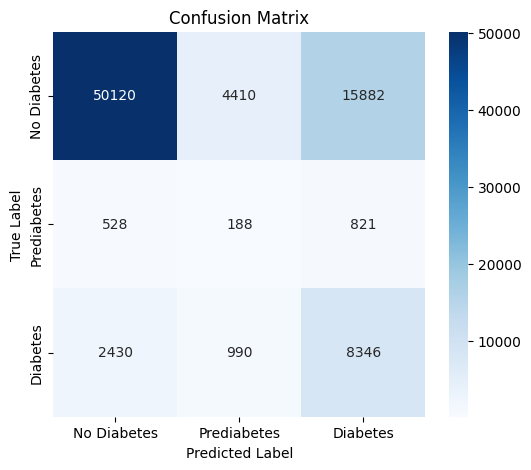

In [34]:
plt.figure(figsize=(6, 5))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Prediabetes", "Diabetes"],
            yticklabels=["No Diabetes", "Prediabetes", "Diabetes"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

#### Classification Report

In [35]:
# Cross Validation Classification Report
from sklearn.metrics import classification_report

report = classification_report(Y_test, predicted, zero_division=1)
print(report)

              precision    recall  f1-score   support

         0.0       0.94      0.71      0.81     70412
         1.0       0.03      0.12      0.05      1537
         2.0       0.33      0.71      0.45     11766

    accuracy                           0.70     83715
   macro avg       0.44      0.51      0.44     83715
weighted avg       0.84      0.70      0.75     83715



### Regression Metrics

Will do later for evaluating predictions on regression machine learning problems.

1. Mean Absolute Error

2. Mean Squared Error

3. R^2

### Spot-Check Classification Algorithms (Linear ML Algorithms)

#### Logistic Regression

Logistic regression assumes a Gaussian distribution for the numeric input variables and can
model binary classification problems.

In my case logistic regression is optimized to scale for large dataset case and modified to solve a multi-class problem

In [36]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Define cross-validation strategy
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

# Create pipeline: StandardScaler + Multi-class Logistic Regression
model = make_pipeline(StandardScaler(),
                      LogisticRegression(solver='saga', max_iter=5000))  # No need for multi_class='multinomial'

# Perform cross-validation
results = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')

# Print mean accuracy across folds
print(f"Mean Accuracy: {results.mean():.3f} (+/- {results.std():.3f})")

Mean Accuracy: 0.846 (+/- 0.002)


#### Linear Discriminant Analysis

LDA is a supervised machine learning algorithm used for classification and dimensionality reduction. It works by finding a linear combination of features that best separate different classes.

In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Define cross-validation strategy
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

# Initialize LDA model
model = LinearDiscriminantAnalysis()

# Perform cross-validation
results = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')

# Print mean accuracy across folds
print(f"Mean Accuracy: {results.mean():.3f} (+/- {results.std():.3f})")

Mean Accuracy: 0.845 (+/- 0.002)


### Spot-Check Classification Algorithms (Non-Linear ML Algorithms)

#### k-Nearest Neighbors

The k-Nearest Neighbors algorithm (or KNN) uses a distance metric to find the k most similar
instances in the training data for a new instance and takes the mean outcome of the neighbors
as the prediction.

In [38]:
from sklearn.neighbors import KNeighborsClassifier

# Define cross-validation strategy
kfold = KFold(n_splits=10, random_state=7, shuffle=True)  # Shuffling for better results

# Define model
model = KNeighborsClassifier()

# Perform cross-validation
results = cross_val_score(model, X_scaled, Y, cv=kfold, scoring='accuracy')

# Print accuracy score
print(f"Accuracy: {results.mean():.3f} ({results.std():.3f})")

Accuracy: 0.831 (0.002)


#### Naive Bayes

Naive Bayes estimates class probabilities and conditional probabilities for each input, assuming independence. For real-valued data, it uses a Gaussian distribution to compute probabilities with the Gaussian Probability Density Function.

In [39]:
from sklearn.naive_bayes import GaussianNB

# Define cross-validation strategy
kfold = KFold(n_splits=10, random_state=7, shuffle=True)  # Shuffling for better results

# Define model
model = GaussianNB()

# Perform cross-validation
results = cross_val_score(model, X_scaled, Y, cv=kfold, scoring='accuracy')

# Print accuracy score
print(f"Accuracy: {results.mean():.3f} ({results.std():.3f})")

Accuracy: 0.757 (0.002)


#### Decision Trees

Classification and Regression Trees (CART or just decision trees) construct a binary tree from
the training data. Split points are chosen greedily by evaluating each attribute and each value
of each attribute in the training data in order to minimize a cost function (like the Gini index).


In [40]:
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

# Define stratified cross-validation (better for class imbalance)
kfold = StratifiedKFold(n_splits=10, random_state=7, shuffle=True)

# Initialize Decision Tree model
model = DecisionTreeClassifier(random_state=7)

# Perform cross-validation
results = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')

# Print mean accuracy across folds
print(f"Mean Accuracy: {results.mean():.3f} (+/- {results.std():.3f})")

Mean Accuracy: 0.768 (+/- 0.003)


#### Support Vector Machines

Support Vector Machines (or SVM) seek a line that best separates two classes. Those data
instances that are closest to the line that best separates the classes are called support vectors
and influence where the line is placed. SVM has been extended to support multiple classes.

Uses LinearSVC for better speed. SVM takes too much computational time for large dataset which is not ideal.

In [41]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Define cross-validation strategy
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

# Create pipeline: StandardScaler + LinearSVC
model = make_pipeline(StandardScaler(), LinearSVC(dual=False, max_iter=5000))

# Perform cross-validation
results = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')

# Print mean accuracy across folds
print(f"Mean Accuracy: {results.mean():.3f} (+/- {results.std():.3f})")


Mean Accuracy: 0.846 (+/- 0.002)


### Compare ML Algorithms

Let's re-run all the algorithms we have learned so far for a fair evaluation.

We have standarized the features for optimized training.

In [42]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define models (using LinearSVC)
models = [
    ('LR', OneVsRestClassifier(LogisticRegression(solver='saga', max_iter=500))),
    ('LDA', LinearDiscriminantAnalysis()),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('NB', GaussianNB()),
    ('LinearSVC', OneVsRestClassifier(LinearSVC(max_iter=10000)))
]

# Cross-validation setup
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
results = []
names = []

# Evaluate models
for name, model in models:
    cv_results = cross_val_score(model, X_scaled, Y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean():.3f} (+/- {cv_results.std():.3f})")


LR: 0.846 (+/- 0.001)
LDA: 0.845 (+/- 0.002)
KNN: 0.831 (+/- 0.002)
CART: 0.767 (+/- 0.002)
NB: 0.757 (+/- 0.002)
LinearSVC: 0.846 (+/- 0.002)


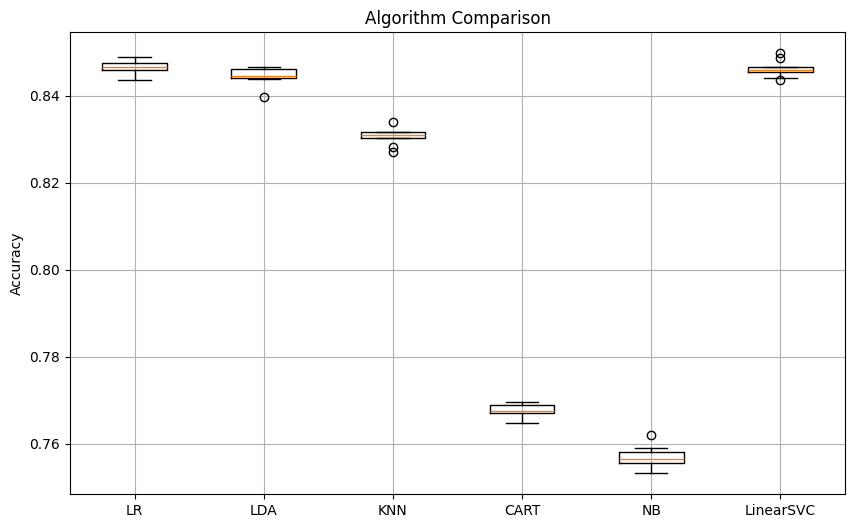

In [43]:
plt.figure(figsize=(10, 6))
plt.boxplot(results, tick_labels=names)  # Use tick_labels instead of labels
plt.title('Algorithm Comparison')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

### Automating ML Workflows with Pipelines

#### What is Pipelining in Machine Learning?

Pipelining is a technique used to streamline the process of applying multiple transformations and models in a structured sequence. Instead of manually performing each step separately (e.g., feature scaling, model training), a pipeline automates the workflow.

#### Why Use Pipelines?

✔ Automation – Eliminates repetitive tasks

✔ Code Cleanliness – Reduces redundant code

✔ Prevents Data Leakage – Ensures transformations (e.g., scaling) are only fitted on training data

✔ Consistency – Guarantees that preprocessing steps are applied correctly to training and test data


#### Data Preparation and Modeling Pipeline

The pipeline is defined with two steps:
1. Standardize the data.
2. Learn a Linear Discriminant Analysis model.

The pipeline is then evaluated using 10-fold cross validation.


In [44]:
from sklearn.pipeline import Pipeline

# Define LDA pipeline
lda_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('lda', LinearDiscriminantAnalysis())  # Apply LDA
])

# Cross-validation setup
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

# Evaluate LDA pipeline
cv_results = cross_val_score(lda_pipeline, X, Y, cv=kfold, scoring='accuracy')

# Print results
print(f"LDA: {cv_results.mean():.3f} (+/- {cv_results.std():.3f})")


LDA: 0.845 (+/- 0.002)


#### Feature Extraction and Modeling Pipeline

This pipeline is defined with four steps:

1. Feature Extraction with Principal Component Analysis (3 features).
2. Feature Extraction with Statistical Selection (6 features).
3. Feature Union.
4. Learn a Logistic Regression Model.

The pipeline is then evaluated using 10-fold cross validation.

In [45]:
from sklearn.pipeline import FeatureUnion

# Define feature extraction (PCA + SelectKBest)
feature_union = FeatureUnion([
    ('pca', PCA(n_components=3)),      # Extract top 3 principal components
    ('select_best', SelectKBest(k=6))  # Select top 6 best features
])

# Define pipeline (Standardization → Feature Extraction → Logistic Regression)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_union', feature_union),
    ('logistic', OneVsRestClassifier(LogisticRegression(solver='saga', max_iter=500)))

])

# Cross-validation setup
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

# Evaluate pipeline
cv_results = cross_val_score(pipeline, X, Y, cv=kfold, scoring='accuracy')

# Print results
print(f"Logistic Regression with Feature Extraction: {cv_results.mean():.3f} (+/- {cv_results.std():.3f})")


Logistic Regression with Feature Extraction: 0.846 (+/- 0.001)


### Improve Performance with Ensembles

Ensembles can give you a boost in accuracy on your dataset.

Bagging (Bootstrap Aggregation) improves model performance by training multiple models on different samples of the training data (with replacement) and averaging their predictions. It works best with high-variance models like decision trees.

#### Bagged Decision Trees

Uses multiple unpruned decision trees.


In [4]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Convert to NumPy for efficiency
X = data.iloc[:, 1:].values.astype(np.float32)  # Features
Y = data.iloc[:, 0].values  # Target variable (keep as it is)

seed = 7
kfold = KFold(n_splits=5, random_state=seed, shuffle=True)  # Reduce n_splits for faster training
cart = DecisionTreeClassifier()

num_trees = 50  # Reduce to 50; can increase if performance is low

# Optimized BaggingClassifier
model = BaggingClassifier(
    estimator=cart,
    n_estimators=num_trees,
    random_state=seed,
    n_jobs=-1,  # Use all available CPU cores
    warm_start=True  # Helps reuse previous trees, speeding up training
)

# Run cross-validation
results = cross_val_score(model, X, Y, cv=kfold)

print(f"Mean Accuracy: {results.mean():.4f}")


Mean Accuracy: 0.8343


#### Random Forest

Introduces randomness in feature selection.

Random Forest is an extension of bagged decision trees that reduces correlation between individual trees. It achieves this by:

Sampling the training dataset with replacement (bootstrap sampling).

Constructing multiple decision trees, but at each split, only a random subset of features is considered rather than selecting the best split greedily.

In [5]:
import numpy as np
import warnings
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Suppress warnings
warnings.simplefilter("ignore")

# Convert to NumPy for faster computation
X = data.iloc[:, 1:].values.astype(np.float32)  # Features (excluding first column)
Y = data.iloc[:, 0].values  # Target variable (first column)

num_trees = 50  # Reduce number of trees
max_features = "sqrt"  # Optimal for classification
max_depth = 20  # Limits tree depth
max_samples = 0.8  # Uses only 80% of data per tree

kfold = KFold(n_splits=3, random_state=7, shuffle=True)  # Reduce to 3 folds

model = RandomForestClassifier(
    n_estimators=num_trees,
    max_features=max_features,
    max_depth=max_depth,
    max_samples=max_samples,
    random_state=7,
    n_jobs=-1,  # Uses all CPU cores
    verbose=0  # Disable logs
)

# Run cross-validation (faster with reduced folds)
results = cross_val_score(model, X, Y, cv=kfold)

print(f"Mean Accuracy: {results.mean():.4f}")

Mean Accuracy: 0.8473


#### Extra Trees

Further randomizes tree splits.

In [6]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import ExtraTreesClassifier

# Convert to NumPy for efficiency
X = data.iloc[:, 1:].values.astype(np.float32)  # Features (excluding first column)
Y = data.iloc[:, 0].values  # Target variable (first column)

num_trees = 100
max_features = "sqrt"  # Optimal feature selection strategy for classification

# Reduce n_splits for faster evaluation
kfold = KFold(n_splits=5, random_state=7, shuffle=True)

# Optimized ExtraTreesClassifier
model = ExtraTreesClassifier(
    n_estimators=num_trees,
    max_features=max_features,
    random_state=7,
    n_jobs=-1  # Uses all CPU cores for parallel training
)

# Run cross-validation
results = cross_val_score(model, X, Y, cv=kfold)

print(f"Mean Accuracy: {results.mean():.4f}")


Mean Accuracy: 0.8336


Boosting is an ensemble learning technique that builds models sequentially, where each model corrects the errors of its predecessor. The final prediction is made by combining the outputs of all models, often weighted by their accuracy.

#### AdaBoost

AdaBoost is a pioneering boosting algorithm that assigns weights to data points based on their classification difficulty. Hard-to-classify instances receive more focus in subsequent models, improving overall accuracy.

In [7]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Convert to NumPy for faster computation
X = data.iloc[:, 1:].values.astype(np.float32)  # Features (excluding first column)
Y = data.iloc[:, 0].values  # Target variable (first column)

num_trees = 20  # Reduce number of estimators for speed
seed = 7

# Reduce to 3-fold cross-validation
kfold = KFold(n_splits=3, random_state=seed, shuffle=True)

# Base model for boosting
base_model = DecisionTreeClassifier(max_depth=1)  # Stump trees (faster)

# AdaBoost Classifier
model = AdaBoostClassifier(
    estimator=base_model,
    n_estimators=num_trees,
    random_state=seed
)

# Run cross-validation
results = cross_val_score(model, X, Y, cv=kfold, n_jobs=-1)

print(f"Mean Accuracy: {results.mean():.4f}")


Mean Accuracy: 0.8462


#### Stochastic Gradient Boosting

Stochastic Gradient Boosting (or Gradient Boosting Machines) is a powerful ensemble technique known for its high performance. It improves predictions by sequentially correcting errors, making it one of the most effective ensemble methods.

In [8]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

# Convert data to NumPy for faster processing
X = data.iloc[:, 1:].values.astype(np.float32)  # Features
Y = data.iloc[:, 0].values  # Target variable

seed = 7
num_trees = 50  # Reduce for speed
subsample_ratio = 0.8  # Introduce stochasticity
max_depth = 3  # Limit complexity

# Reduce cross-validation folds for efficiency
kfold = KFold(n_splits=3, random_state=seed, shuffle=True)

# Stochastic Gradient Boosting Classifier
model = GradientBoostingClassifier(
    n_estimators=num_trees,
    max_depth=max_depth,
    subsample=subsample_ratio,
    random_state=seed
)

# Run cross-validation
results = cross_val_score(model, X, Y, cv=kfold, n_jobs=-1)

print(f"Mean Accuracy: {results.mean():.4f}")


Mean Accuracy: 0.8495


Voting is a simple ensemble method that combines predictions from multiple machine learning models. It works by training standalone models and then using a Voting Classifier to average their predictions for new data.

#### Voting Ensemble

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Ensure `data` is defined before proceeding
if 'data' not in locals():
    raise ValueError("Dataset 'data' is not defined. Load it before running the script.")

# Handle missing values
imputer = SimpleImputer(strategy="mean")  # Replace missing values with mean
scaler = StandardScaler()  # Standardize features

# Convert data to NumPy for efficiency
X = imputer.fit_transform(data.iloc[:, 1:].values.astype(np.float32))  # Features
Y = data.iloc[:, 0].values  # Target variable

# Split dataset (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7, stratify=Y)

# Create base models with pipelines
estimators = [
    ('logistic', Pipeline([
        ('scaler', scaler),
        ('model', LogisticRegression(max_iter=500, n_jobs=-1, random_state=7))
    ])),
    ('cart', DecisionTreeClassifier(max_depth=10, random_state=7)),  # Limit depth to prevent overfitting
    ('svm', Pipeline([
        ('scaler', scaler),
        ('model', LinearSVC(max_iter=1000, random_state=7))
    ]))
]

# Create the ensemble model
ensemble = VotingClassifier(estimators, voting='hard', n_jobs=-1)  # Use 'hard' voting for faster computation

# Train on training set
ensemble.fit(X_train, Y_train)

# Evaluate on test set
accuracy = ensemble.score(X_test, Y_test)

print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.8477


### Improve Performance with Algorithm Tuning

Parameter tuning is essential for optimizing machine learning model performance. This process, known as hyperparameter optimization, involves selecting the best combination of parameters for a given problem.

Scikit-learn provides two key methods for parameter tuning:

Grid Search – Systematically evaluates all possible parameter combinations in a predefined grid using GridSearchCV.

Random Search – Randomly samples parameter combinations to find an optimal set efficiently.

#### Grid Search

Grid search ensures thorough evaluation but can be computationally expensive, while random search offers a more efficient alternative for large parameter spaces.

In [4]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Ensure `data` is loaded
if 'data' not in locals():
    raise ValueError("Dataset 'data' is not defined. Load it before running the script.")

# Handle missing values
imputer = SimpleImputer(strategy="mean")
scaler = StandardScaler()

# Prepare features and target
X = imputer.fit_transform(data.iloc[:, 1:].values.astype(np.float32))  # Features
Y = data.iloc[:, 0].values  # Target variable

# Define hyperparameter grid
alphas = np.array([1, 0.1, 0.01, 0.001, 0.0001, 0])
param_grid = dict(model__alpha=alphas)

# Use a pipeline for preprocessing
ridge_pipeline = Pipeline([
    ('scaler', scaler),
    ('model', Ridge())
])

# Use 5-fold cross-validation with shuffling
kfold = KFold(n_splits=5, shuffle=True, random_state=7)

# Run Grid Search
grid = GridSearchCV(estimator=ridge_pipeline, param_grid=param_grid, cv=kfold, n_jobs=-1)
grid.fit(X, Y)

# Print best results
print(f"Best Score: {grid.best_score_:.4f}")
print(f"Best Alpha: {grid.best_estimator_.named_steps['model'].alpha}")


Best Score: 0.1724
Best Alpha: 1.0


#### Random Search Parameter Tuning
Random search is an efficient alternative to grid search for hyperparameter tuning. Instead of evaluating all possible combinations, it randomly samples parameter values from a predefined distribution (e.g., uniform).

Using RandomizedSearchCV, models are trained and evaluated for a fixed number of iterations with randomly chosen parameter values. This approach is computationally efficient and works well for large parameter spaces.

In [5]:
import numpy as np
from scipy.stats import uniform
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Ensure `data` is loaded
if 'data' not in locals():
    raise ValueError("Dataset 'data' is not defined. Load it before running the script.")

# Handle missing values
imputer = SimpleImputer(strategy="mean")
scaler = StandardScaler()

# Prepare features and target
X = imputer.fit_transform(data.iloc[:, 1:].values.astype(np.float32))  # Features
Y = data.iloc[:, 0].values  # Target variable

# Define hyperparameter distribution
param_dist = {'model__alpha': uniform(0.0001, 10)}  # Search in range 0.0001 to 10

# Use a pipeline for preprocessing
ridge_pipeline = Pipeline([
    ('scaler', scaler),
    ('model', Ridge())
])

# Use 5-fold cross-validation with shuffling
kfold = KFold(n_splits=5, shuffle=True, random_state=7)

# Run Randomized Search
rsearch = RandomizedSearchCV(
    estimator=ridge_pipeline,
    param_distributions=param_dist,
    n_iter=50,  # Reduced to 50 for faster execution
    cv=kfold,
    n_jobs=-1,
    random_state=7
)
rsearch.fit(X, Y)

# Print best results
print(f"Best Score: {rsearch.best_score_:.4f}")
print(f"Best Alpha: {rsearch.best_estimator_.named_steps['model'].alpha}")


Best Score: 0.1724
Best Alpha: 9.779995119966026


### Save and Load Machine Learning Models

Machine learning models should be saved for reuse instead of retraining from scratch.

Serialized models can be used for deployment and making predictions on new data.

#### Saving and Loading with Pickle

pickle is Python's built-in serialization tool for saving and loading objects.

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from pickle import dump, load

# Ensure data is loaded
if 'data' not in locals():
    raise ValueError("Dataset 'data' is not defined. Load it before running the script.")

# Extract features and labels
X = data.iloc[:, 1:].values.astype(np.float32)  # Features
Y = data.iloc[:, 0].values  # Target variable (multi-label)

# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7, stratify=Y)

# Define preprocessing pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="mean")),  # Handle missing values
    ('scaler', StandardScaler()),  # Standardize features
    ('model', LogisticRegression(max_iter=1000, n_jobs=-1, random_state=7))
])

# Train the model
pipeline.fit(X_train, Y_train)

# Save the model
filename = 'finalized_model.pkl'
dump(pipeline, open(filename, 'wb'))
print(f"Model saved as {filename}")

# Load the model
loaded_model = load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(f"Test Accuracy: {result:.4f}")

Model saved as finalized_model.pkl
Test Accuracy: 0.8464


#### Saving and Loading with Joblib

joblib (part of SciPy) is optimized for handling large NumPy arrays efficiently.

It is preferred for large models like k-Nearest Neighbors that store a lot of data.

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from joblib import dump, load  # Efficient model saving

# Ensure data is loaded
if 'data' not in locals():
    raise ValueError("Dataset 'data' is not defined. Load it before running the script.")

# Extract features and labels
X = data.iloc[:, 1:].values.astype(np.float32)  # Features
Y = data.iloc[:, 0].values  # Target variable (multi-label)

# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7, stratify=Y)

# Define preprocessing pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="mean")),  # Handle missing values
    ('scaler', StandardScaler()),  # Standardize features
    ('model', LogisticRegression(max_iter=1000, n_jobs=-1, random_state=7))
])

# Train the model
pipeline.fit(X_train, Y_train)

# Save the model using Joblib
filename = 'finalized_model.joblib'
dump(pipeline, filename)
print(f"Model saved as {filename}")

# Load the model
loaded_model = load(filename)
result = loaded_model.score(X_test, Y_test)
print(f"Test Accuracy: {result:.4f}")

Model saved as finalized_model.joblib
Test Accuracy: 0.8464


Key Differences:

pickle saves models as a single file.

joblib saves models and their NumPy arrays separately, making it more efficient for large models